# Week 5 hand in

## 01 Assignment
## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

## 02 Status
    Ex1:
        Task 1,2,3,4: completed
        Task 5:
            A  completed
            B  completed
            C  completed
            D  completed
        
    Ex2: not completed

## 03 Solution part 1

Saves data in file and reads from it

In [1]:
import pandas as pd 

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&ALDER=*%2C%2CIALT&CIVILSTAND=U%2CG%2CE%2CF%2CTOT&K%C3%98N=TOT&Tid=2008K4%2C2009K4%2C2010K4%2C2011K4%2C2012K4%2C2013K4%2C2014K4%2C2015K4%2C2016K4%2C2017K4%2C2018K4%2C2019K4%2C2020K4&OMR%C3%85DE=101%2C851%2C751%2C561%2C461%2C000'
filename='./data/dk-stat-civilstand.csv'
dst = pd.read_csv(url)
dst.to_csv(filename, encoding='utf-8', index=False)

#cst=pd.read_csv(filename, sep=";",  usecols=[1,2,3,4,5])

cst=pd.read_csv(filename, sep=";")
cst




,ALDER,CIVILSTAND,KØN,TID,OMRÅDE,INDHOLD
0,I alt,Ugift,I alt,2008K4,København,315545
1,I alt,Ugift,I alt,2008K4,Aalborg,97764
2,I alt,Ugift,I alt,2008K4,Aarhus,167157
3,I alt,Ugift,I alt,2008K4,Esbjerg,53418
4,I alt,Ugift,I alt,2008K4,Odense,94613
...,...,...,...,...,...,...
49525,125 år,I alt,I alt,2020K4,Aalborg,0
49526,125 år,I alt,I alt,2020K4,Aarhus,0
49527,125 år,I alt,I alt,2020K4,Esbjerg,0
49528,125 år,I alt,I alt,2020K4,Odense,0


## 04 Solution part 2
What is the change in pct of divorced danes from 2008 to 2020?

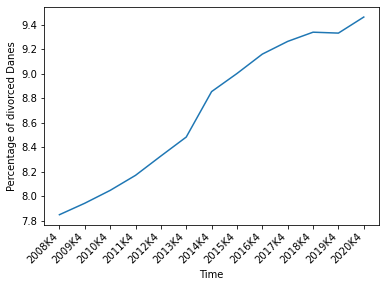

In [2]:
import matplotlib.pyplot as plt

cst.sort_values(by='CIVILSTAND')
divorced=cst[cst['CIVILSTAND'].isin(['Fraskilt']) ]

divorced_all=divorced[divorced['KØN'].isin(['I alt'])]
divorced_hele_landet=divorced_all[divorced['OMRÅDE'].isin(['Hele landet'])]
divorced_total_dk=divorced_hele_landet[divorced_hele_landet['ALDER'].isin(['I alt'])]
divorced_total_dk
status=cst[cst['CIVILSTAND'].isin(['I alt'])] #shows all ages in all areas in gathered civil status

status_dk=status[status['OMRÅDE'].isin(['Hele landet'])] #shows all ages for whole country in gathered civil status
all_status_dk= status_dk[status_dk['ALDER'].isin(['I alt'])] # Shows gathered ages for whole country with gathered civil status
st=all_status_dk.sort_values(by='TID')[['TID','INDHOLD']]
#print('Total amount of citizens per period: \n',st)
dv=divorced_total_dk.sort_values(by='TID')[['TID','INDHOLD']]
#print('\nDivorced Citizens per period: \n', dv)


dvs=tuple(dv['INDHOLD'])
total=tuple(st['INDHOLD'])

pct_dv = pd.DataFrame(data=[dvs[i]/total[i]*100 for i in range(0,len(dvs))], index=st['TID'], columns=['PCT'])
pct_dv


plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.ylabel('Percentage of divorced Danes')
plt.xlabel('Time')
plt.plot(pct_dv)



## 05 Solution part 3
Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

In [3]:
print(set(cst['CIVILSTAND']))
cst
_never_merried=cst[cst['CIVILSTAND'].isin(['Ugift'])]
never_merried=_never_merried[~_never_merried['OMRÅDE'].isin(['Hele landet'])]
never_merried_total=never_merried[never_merried['ALDER'].isin(['I alt'])]
never_merried_total_2020=never_merried_total[never_merried_total['TID'].isin(['2020K4'])]

#total citizens with 'Ugift' st:
nm_2020=never_merried_total_2020.sort_values(by='OMRÅDE')

_all_civil=cst[cst['CIVILSTAND'].isin(['I alt'])]
_all_civil_total=_all_civil[_all_civil['ALDER'].isin(['I alt'])]
_all_civil_total_2020=_all_civil_total[_all_civil_total['TID'].isin(['2020K4'])]

#total citizens with all civil st:
cv_2020=_all_civil_total_2020[~_all_civil_total_2020['OMRÅDE'].isin(['Hele landet'])].sort_values(by='OMRÅDE')

#print('never merried: \n', nm_2020)
#print('all: \n', cv_2020)
nm=tuple(nm_2020['INDHOLD'])
cv=tuple(cv_2020['INDHOLD'])

pct_unmerried = pd.DataFrame(data=[nm[i]/cv[i]*100 for i in range(0,len(cv_2020))], index=cv_2020['OMRÅDE'], columns=['PCT'])

city_with_highest_pct=pct_unmerried.sort_values(by='PCT', ascending=False).iloc[0,:]

print(city_with_highest_pct)

{'Fraskilt', 'I alt', 'Enke/enkemand', 'Ugift', 'Gift/separeret'}
PCT    65.489642
Name: København, dtype: float64


## 05 Solution part 4
Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

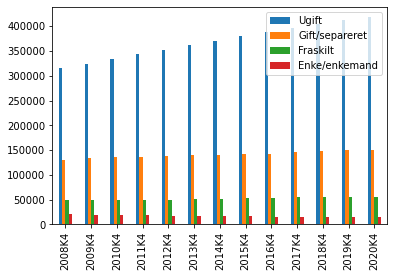

In [4]:
cst
TID=sorted(list(set(cst['TID'])))
#print(TID)

data_cph=cst[cst['OMRÅDE'].isin(['København'])]
_data_cph_total_age=data_cph[data_cph['ALDER'].isin(['I alt'])]
data_cph_total_age=_data_cph_total_age[~_data_cph_total_age['CIVILSTAND'].isin(['I alt'])]
data_cph_total_age

data_by_status={}

statuses=set(data_cph_total_age['CIVILSTAND'])

for st in statuses:
    ctz=data_cph_total_age[data_cph_total_age['CIVILSTAND'].isin([st])].sort_values(by='TID')
    #print("ctz:\n",ctz)
    citizens=pd.Series(tuple(ctz['INDHOLD']),index=TID)
    #print(TID.sort())

    #print("citizens:\n",citizens)
    data_by_status[st]=citizens

data_by_status
result=pd.concat(data_by_status, axis=1)
result

result.plot.bar()

## 05 Solution part 5
Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

<Figure size 432x288 with 0 Axes>

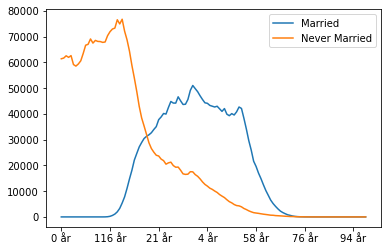

In [5]:
cst
_ages=list(set(cst['ALDER']))
_ages.remove('I alt')
ages=sorted(_ages)

all_ages_full_data_all_years=cst[cst['ALDER'].isin(ages)]
all_ages_full_data=all_ages_full_data_all_years[all_ages_full_data_all_years['TID'].isin(['2020K4'])]
all_ages_full_data_dk=all_ages_full_data[all_ages_full_data['OMRÅDE'].isin(['Hele landet'])]


ugift=all_ages_full_data_dk[all_ages_full_data_dk['CIVILSTAND'].isin(['Ugift'])].iloc[:,[0,5]]
_ugift=pd.DataFrame(data=list(ugift['INDHOLD']),index=ages,columns=['Never Married' ])

gift=all_ages_full_data_dk[all_ages_full_data_dk['CIVILSTAND'].isin(['Gift/separeret'])].iloc[:,[0,5]]
_gift=pd.DataFrame(data=list(gift['INDHOLD']),index=ages,columns=['Married' ])



x=pd.concat([_gift,_ugift],axis=1)
plt.figure();
x.plot()
